# Using options.py to Generate Visualizations and Option Prices



In [1]:
import options 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
interest_rate = 0.05

## Generating Sample Paths of Stock Price Process

### Geometric Brownian Motion

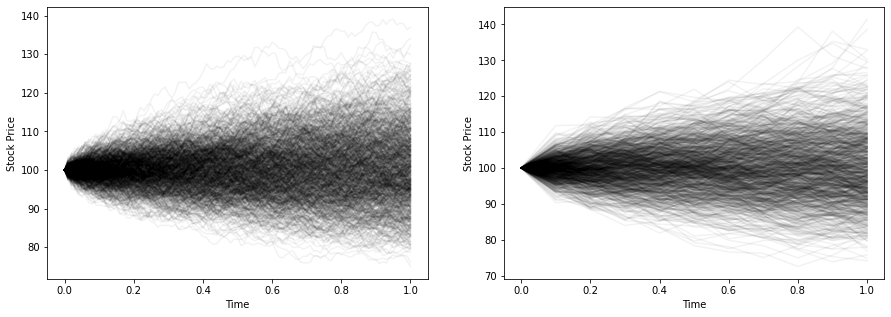

In [3]:
fig, axs = plt.subplots(1, 2, figsize = (15,5)) 
gbm1 = options.GeometricBrownianMotion(0, 0.1, 100)
gbm1.plot_sample_paths(1000, 100, alpha = 0.05, ax = axs[0])
gbm1.plot_sample_paths(1000, 10, alpha = 0.05, ax = axs[1])
plt.show()

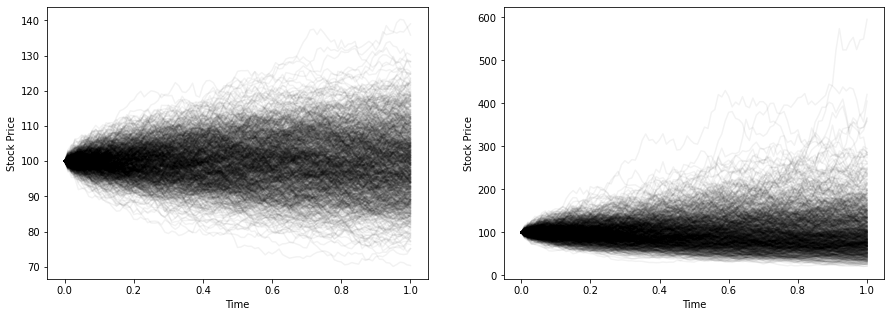

In [4]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
gbm2 = options.GeometricBrownianMotion(0, 0.5, 100)
gbm1.plot_sample_paths(1000, 100, alpha = 0.05, ax = axs[0])
gbm2.plot_sample_paths(1000, 100, alpha = 0.05, ax = axs[1])
plt.show()

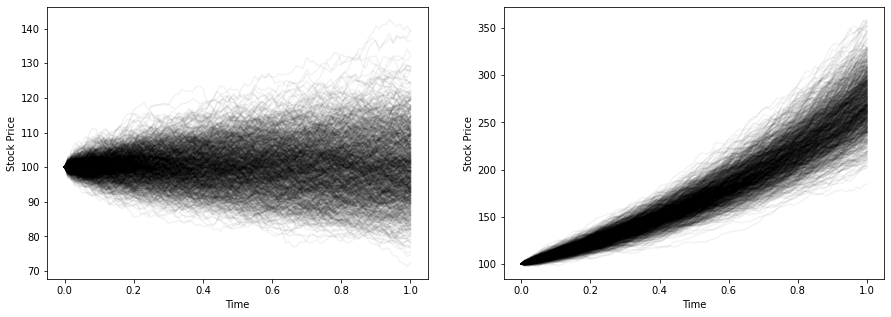

In [5]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
gbm3 = options.GeometricBrownianMotion(1, 0.1, 100)
gbm1.plot_sample_paths(1000, 100, alpha = 0.05, ax = axs[0])
gbm3.plot_sample_paths(1000, 100, alpha = 0.05, ax = axs[1])
plt.show()

### Binomial Trees

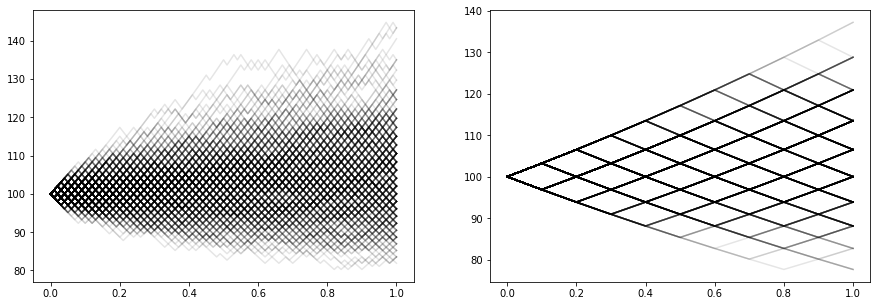

In [6]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
bin_tree1 = options.BinomialTree(0.1, 100, 100)
q1 = (np.exp(interest_rate * bin_tree1.delta_t) - bin_tree1.d)/(bin_tree1.u - bin_tree1.d)
bin_tree1.plot_sample_paths(q1, 500, ax = axs[0])
bin_tree2 = options.BinomialTree(0.1, 100, 10)
q2 = (np.exp(interest_rate * bin_tree2.delta_t) -  bin_tree2.d)/(bin_tree2.u - bin_tree2.d)
bin_tree2.plot_sample_paths(q2, 500, ax = axs[1])
plt.show()

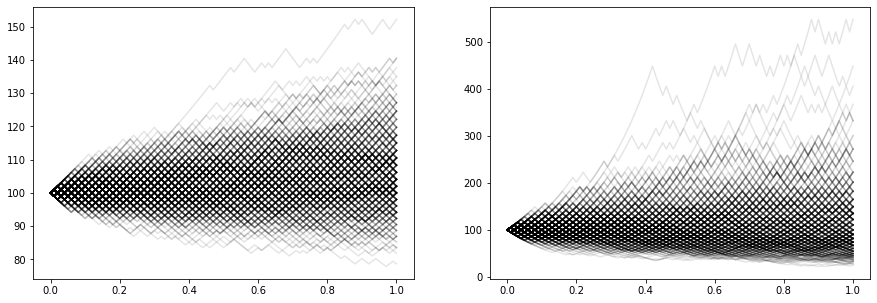

In [7]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
bin_tree1.plot_sample_paths(q1, 500, ax = axs[0])
bin_tree3 = options.BinomialTree(0.5, 100, 100)
q3 = (np.exp(interest_rate * bin_tree3.delta_t) - bin_tree3.d)/(bin_tree3.u - bin_tree3.d)
bin_tree3.plot_sample_paths(q3, 500, ax = axs[1])
plt.show()

### Trinomial Tree

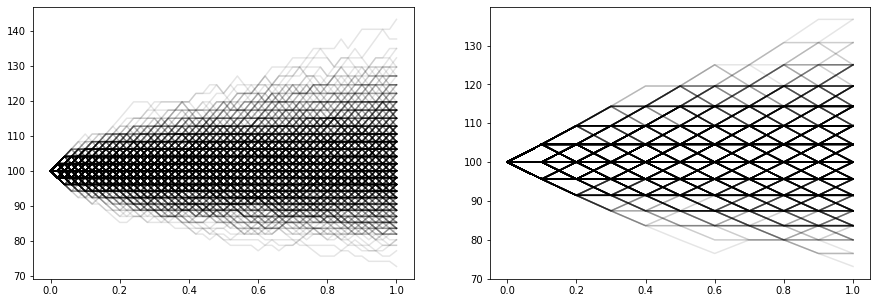

In [8]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
tri_tree1 = options.TrinomialTree(0.1, 100, 50, interest_rate)
tri_tree1.plot_sample_paths(1000, ax = axs[0])
tri_tree2 = options.TrinomialTree(0.1, 100, 10, interest_rate)
tri_tree2.plot_sample_paths(1000, ax = axs[1])
plt.show()

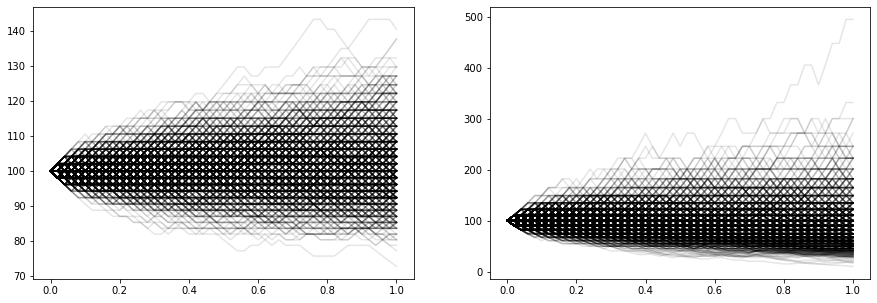

In [9]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
tri_tree1.plot_sample_paths(1000, ax = axs[0])
tri_tree3 = options.TrinomialTree(0.5, 100, 50, interest_rate)
tri_tree3.plot_sample_paths(1000, ax = axs[1])
plt.show()

## Option Pricing

## Generic Option Class

### Lookback Options

In [10]:
strike_call = 90
strike_put = 110

def LookbackValue(S, K, c):
    return np.maximum(np.max(S) - K, 0) * c + np.maximum(K - np.min(S), 0) * (1 - c)

LookBackCall = options.Option(gbm1, strike_call, interest_rate, 1, LookbackValue)
LookBackPut = options.Option(gbm1, strike_put, interest_rate, 0, LookbackValue)

In [11]:
print(f"Price of Lookback Call Option: {LookBackCall.get_monte_carlo_price(100, 1000)}")
print(f"Price of Lookback Put Option: {LookBackPut.get_monte_carlo_price(100, 1000)}")

Price of Lookback Call Option: 19.546466485101597
Price of Lookback Put Option: 14.49888864361926


In [12]:
mc_lbc = LookBackCall.get_monte_carlo_simulation(100, 1000)
mc_lbp = LookBackPut.get_monte_carlo_simulation(100, 1000)

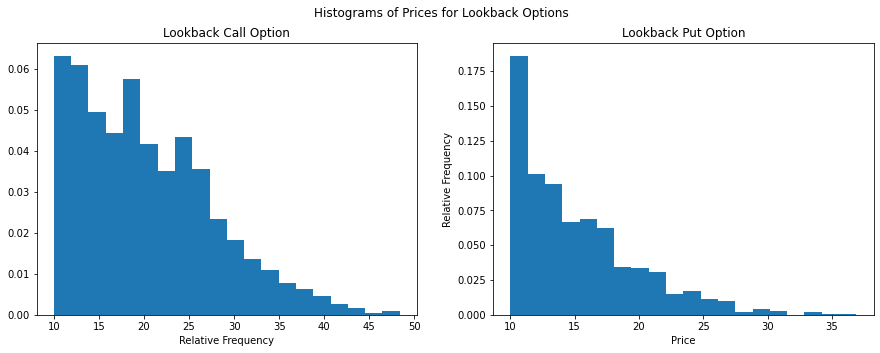

In [13]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
axs[0].hist(mc_lbc, bins = 20, density = True)
axs[0].set_xlabel("Price")
axs[0].set_xlabel("Relative Frequency")
axs[0].set_title("Lookback Call Option")
axs[1].hist(mc_lbp, bins = 20, density = True)
axs[1].set_xlabel("Price")
axs[1].set_ylabel("Relative Frequency")
axs[1].set_title("Lookback Put Option")
fig.suptitle("Histograms of Prices for Lookback Options")
plt.show()

### Asian Options

In [14]:
AsianFixedCall = options.AsianOption(gbm1, strike_call, interest_rate, 1, 0)
AsianFloatingCall = options.AsianOption(gbm1, strike_call, interest_rate, 1, 1)
AsianFixedPut = options.AsianOption(gbm1, strike_put, interest_rate, 0, 0)
AsianFloatingPut = options.AsianOption(gbm1, strike_put, interest_rate, 0, 1)

In [15]:
print(f"Price of Asian Call Option with Fixed Strike: {AsianFixedCall.get_monte_carlo_price(100, 1000)}")
print(f"Price of Asian Call Option with Floating Strike: {AsianFloatingCall.get_monte_carlo_price(100, 1000)}")
print(f"Price of Asian Put Option with Fixed Strike: {AsianFixedPut.get_monte_carlo_price(100, 1000)}")
print(f"Price of Asian Put Option with Floating Strike: {AsianFloatingPut.get_monte_carlo_price(100, 1000)}")

Price of Asian Call Option with Fixed Strike: 3.6479248751711952
Price of Asian Call Option with Floating Strike: 11.831001504314948
Price of Asian Put Option with Fixed Strike: 1.3970402409169769
Price of Asian Put Option with Floating Strike: 7.193499317970436


In [16]:
mc_axc = AsianFixedCall.get_monte_carlo_simulation(100,1000)
mc_afc = AsianFloatingCall.get_monte_carlo_simulation(100, 1000)
mc_axp = AsianFixedPut.get_monte_carlo_simulation(100, 1000)
mc_afp = AsianFloatingPut.get_monte_carlo_simulation(100, 1000)

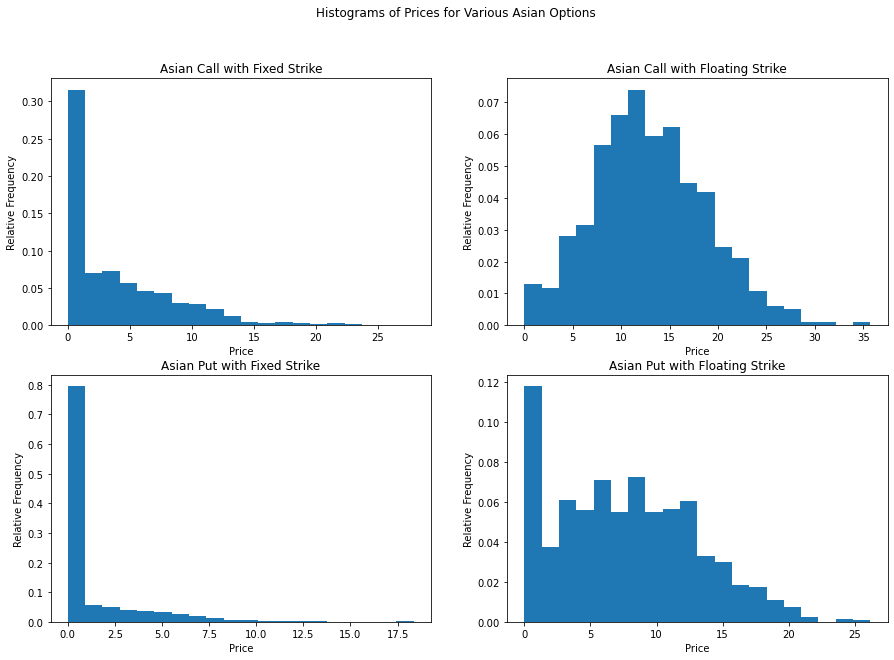

In [17]:
fig, axs = plt.subplots(2, 2, figsize = (15, 10))
axs[0,0].hist(mc_axc, bins = 20, density = True)
axs[0,0].set_xlabel("Price")
axs[0,0].set_ylabel("Relative Frequency")
axs[0,0].set_title("Asian Call with Fixed Strike")
axs[0,1].hist(mc_afc, bins = 20, density = True)
axs[0,1].set_xlabel("Price")
axs[0,1].set_ylabel("Relative Frequency")
axs[0,1].set_title("Asian Call with Floating Strike")
axs[1,0].hist(mc_axp, bins = 20, density = True)
axs[1,0].set_xlabel("Price")
axs[1,0].set_ylabel("Relative Frequency")
axs[1,0].set_title("Asian Put with Fixed Strike")
axs[1,1].hist(mc_afp, bins = 20, density = True)
axs[1,1].set_xlabel("Price")
axs[1,1].set_ylabel("Relative Frequency")
axs[1,1].set_title("Asian Put with Floating Strike")
fig.suptitle("Histograms of Prices for Various Asian Options")
plt.show()

## European Options

In [18]:
EuropeanCall = options.EuropeanOption(gbm1, strike_call, interest_rate, 1)
EuropeanPut = options.EuropeanOption(gbm1, strike_put, interest_rate, 0)

In [19]:
print(f"MC Estimate of Price of European Call Option: {EuropeanCall.get_monte_carlo_price(100, 1000)}")
print(f"MC Estimate of Price of European Put Option: {EuropeanPut.get_monte_carlo_price(100, 1000)}")

MC Estimate of Price of European Call Option: 14.611716043442485
MC Estimate of Price of European Put Option: 6.342396528686619


In [20]:
print(f"Price of European Call Option: {EuropeanCall.get_price()}")
print(f"Price of European Put Option: {EuropeanPut.get_price()}")

Price of European Call Option: 14.628837623936462
Price of European Put Option: 6.809181850541407


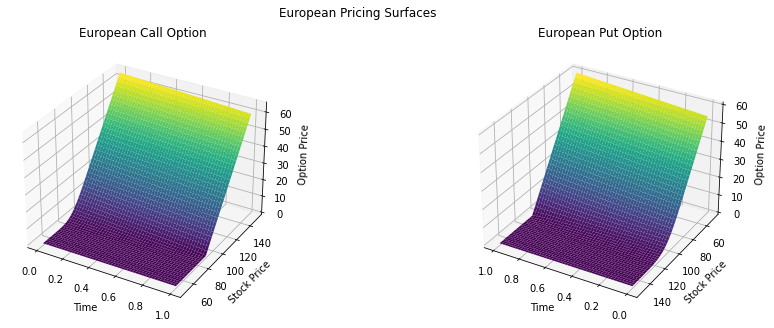

In [43]:
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(121, projection = "3d")
ax2 = fig.add_subplot(122, projection = "3d")
EuropeanCall.get_pricing_surface(50, 150, ax1)
EuropeanPut.get_pricing_surface(50, 150, ax2)
ax2.view_init(azim = 120)
ax1.set_title("European Call Option")
ax2.set_title("European Put Option")
fig.suptitle("European Pricing Surfaces")
plt.show()

### The Greeks

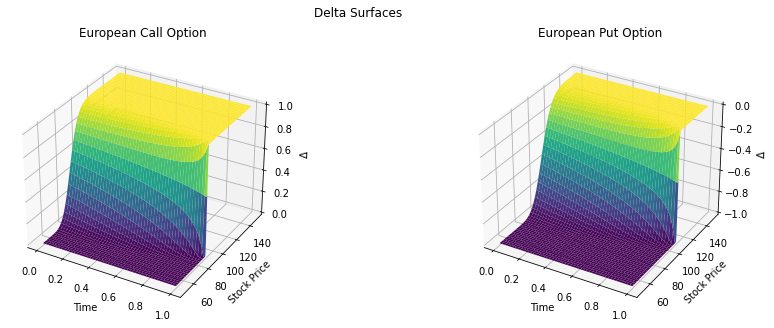

In [57]:
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(121, projection = "3d")
ax2 = fig.add_subplot(122, projection = "3d")
EuropeanCall.get_Delta_surface(50, 150, ax1)
EuropeanPut.get_Delta_surface(50, 150, ax2)
ax1.view_init(azim = 300)
ax2.view_init(azim = 300)
fig.suptitle("Delta Surfaces")
ax1.set_title("European Call Option")
ax2.set_title("European Put Option")
plt.show()

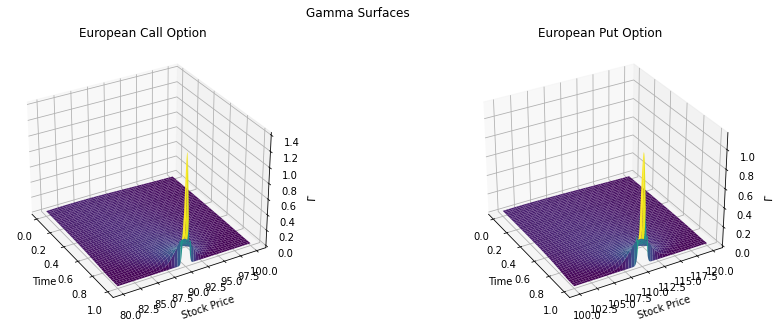

In [68]:
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(121, projection = "3d")
ax2 = fig.add_subplot(122, projection = "3d")
EuropeanCall.get_Gamma_surface(80, 100, ax1)
EuropeanPut.get_Gamma_surface(100, 120, ax2)
ax1.view_init(azim = 330)
ax2.view_init(azim = 330)
fig.suptitle("Gamma Surfaces")
ax1.set_title("European Call Option")
ax2.set_title("European Put Option")
plt.show()

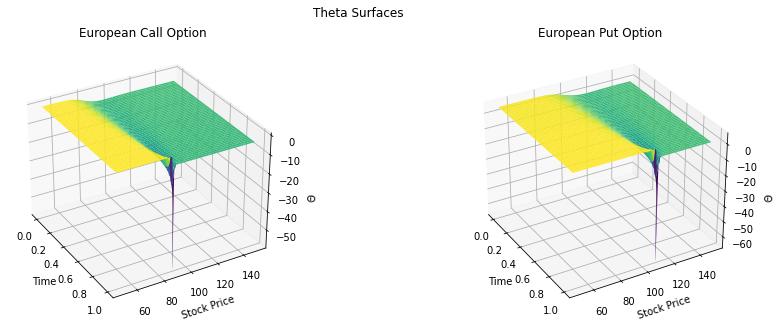

In [71]:
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(121, projection = "3d")
ax2 = fig.add_subplot(122, projection = "3d")
EuropeanCall.get_Theta_surface(50, 150, ax1)
EuropeanPut.get_Theta_surface(50, 150, ax2)
ax1.view_init(azim = 330)
ax2.view_init(azim = 330)
fig.suptitle("Theta Surfaces")
ax1.set_title("European Call Option")
ax2.set_title("European Put Option")
plt.show()

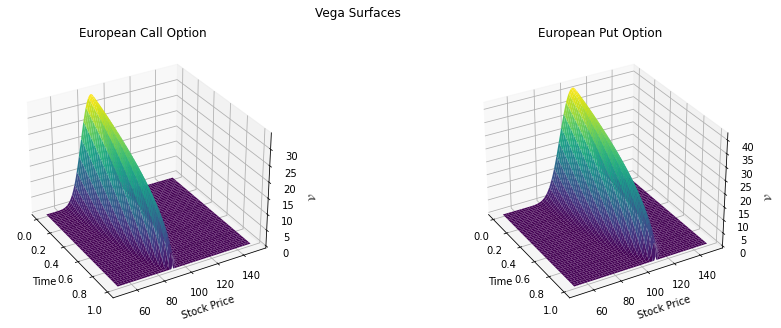

In [74]:
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(121, projection = "3d")
ax2 = fig.add_subplot(122, projection = "3d")
EuropeanCall.get_Vega_surface(50, 150, ax1)
EuropeanPut.get_Vega_surface(50, 150, ax2)
ax1.view_init(azim = 330)
ax2.view_init(azim = 330)
fig.suptitle("Vega Surfaces")
ax1.set_title("European Call Option")
ax2.set_title("European Put Option")
plt.show()

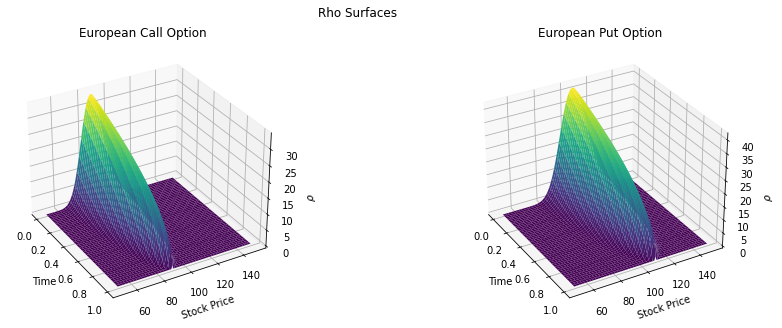

In [78]:
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(121, projection = "3d")
ax2 = fig.add_subplot(122, projection = "3d")
EuropeanCall.get_rho_surface(50, 150, ax1)
EuropeanPut.get_rho_surface(50, 150, ax2)
ax1.view_init(azim = 330)
ax2.view_init(azim = 330)
fig.suptitle("Rho Surfaces")
ax1.set_title("European Call Option")
ax2.set_title("European Put Option")
plt.show()